<a href="https://colab.research.google.com/github/ppimpxm/Movie-Recommendation-System/blob/main/Pim%2C_Mint_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


# Step 1: Import Libraries and Load dataset

In [3]:
from datasets import load_dataset
from transformers import pipeline
import pandas as pd

#Load the dataset
ds = load_dataset("cornell-movie-review-data/rotten_tomatoes", split = 'train')

# Show the first few rows of the dataset (optional, just for preview)
ds[:5]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

train.parquet:   0%|          | 0.00/699k [00:00<?, ?B/s]

validation.parquet:   0%|          | 0.00/90.0k [00:00<?, ?B/s]

test.parquet:   0%|          | 0.00/92.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

{'text': ['the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
  'the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson\'s expanded vision of j . r . r . tolkien\'s middle-earth .',
  'effective but too-tepid biopic',
  'if you sometimes like to go to the movies to have fun , wasabi is a good place to start .',
  "emerges as something rare , an issue movie that's so honest and keenly observed that it doesn't feel like one ."],
 'label': [1, 1, 1, 1, 1]}

In [4]:
# Load sentiment analysis pipeline
# Use a pipeline as a high-level helper

#text-classification: performing text classification, including sentiment analysis
#Model = pig4431/rtm_DistilBERT_5E is specific model use for this dataset
pipe = pipeline("text-classification", model="pig4431/rtm_DistilBERT_5E")

config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/263M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/669k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [5]:
#Convert the dataset to pandas Dataframe
ds_df = pd.DataFrame(ds)


In [6]:
ds_df

,text,label
0,the rock is destined to be the 21st century's ...,1
1,"the gorgeously elaborate continuation of "" the...",1
2,effective but too-tepid biopic,1
3,if you sometimes like to go to the movies to h...,1
4,"emerges as something rare , an issue movie tha...",1
...,...,...
8525,any enjoyment will be hinge from a personal th...,0
8526,if legendary shlockmeister ed wood had ever ma...,0
8527,hardly a nuanced portrait of a young woman's b...,0
8528,"interminably bleak , to say nothing of boring .",0


In [7]:
ds_df.columns

Index(['text', 'label'], dtype='object')

In [8]:
ds_df.shape

(8530, 2)

In [9]:
#Check the value count for the target

ds_df['label'].value_counts()

,count
label,
1,4265
0,4265


In [10]:
ds_df.head(10)

,text,label
0,the rock is destined to be the 21st century's ...,1
1,"the gorgeously elaborate continuation of "" the...",1
2,effective but too-tepid biopic,1
3,if you sometimes like to go to the movies to h...,1
4,"emerges as something rare , an issue movie tha...",1
5,the film provides some great insight into the ...,1
6,offers that rare combination of entertainment ...,1
7,perhaps no picture ever made has more literall...,1
8,steers turns in a snappy screenplay that curls...,1
9,take care of my cat offers a refreshingly diff...,1


# Step 2: Preprocessing

In [12]:
import re

# Example of text preprocessing
def preprocess_text(text):
    # Lowercasing and other preprocessing if needed
    text = text.lower()  # Convert to lowercase
    return text

# Apply preprocessing to the dataset (if needed)
dataset = ds.map(lambda x: {'text': preprocess_text(x['text'])})
dataset[:5]

Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

{'text': ['the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
  'the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson\'s expanded vision of j . r . r . tolkien\'s middle-earth .',
  'effective but too-tepid biopic',
  'if you sometimes like to go to the movies to have fun , wasabi is a good place to start .',
  "emerges as something rare , an issue movie that's so honest and keenly observed that it doesn't feel like one ."],
 'label': [1, 1, 1, 1, 1]}

In [13]:
#Remove stop words: ELiminate common words that don't contribute much meaning

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply stopword removal to the dataset
dataset = dataset.map(lambda example: {'text': remove_stopwords(example['text'])})
dataset[:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Parameter 'function'=<function <lambda> at 0x794b3242d900> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

{'text': ['rock destined 21st century\'s new " conan " he\'s going make splash even greater arnold schwarzenegger , jean-claud van damme steven segal .',
  'gorgeously elaborate continuation " lord rings " trilogy huge column words cannot adequately describe co-writer/director peter jackson\'s expanded vision j . r . r . tolkien\'s middle-earth .',
  'effective too-tepid biopic',
  'sometimes like go movies fun , wasabi good place start .',
  "emerges something rare , issue movie that's honest keenly observed feel like one ."],
 'label': [1, 1, 1, 1, 1]}

In [14]:
#Remove special characters and numbers

def remove_special_characters(text):
    # Remove special characters and numbers
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    return cleaned_text

# Apply cleaned text to dataset
dataset = dataset.map(lambda example: {'text': remove_special_characters(example['text'])})
dataset[:5]



Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

{'text': ['rock destined st centurys new  conan  hes going make splash even greater arnold schwarzenegger  jeanclaud van damme steven segal ',
  'gorgeously elaborate continuation  lord rings  trilogy huge column words cannot adequately describe cowriterdirector peter jacksons expanded vision j  r  r  tolkiens middleearth ',
  'effective tootepid biopic',
  'sometimes like go movies fun  wasabi good place start ',
  'emerges something rare  issue movie thats honest keenly observed feel like one '],
 'label': [1, 1, 1, 1, 1]}

In [15]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources if you haven't already
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

def stem_and_lemmatize(text):
    words = word_tokenize(text)
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]

    # Join the processed words back into a single string
    processed_text = ' '.join(lemmatized_words)

    return processed_text

# Apply the stem_and_lemmatize function to the 'text' column of your dataset
dataset = dataset.map(lambda example: {'text': stem_and_lemmatize(example['text'])})

# Display the first 5 examples of the processed dataset
dataset[:5]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

{'text': ['rock destin st centuri new conan he go make splash even greater arnold schwarzenegg jeanclaud van damm steven segal',
  'gorgeous elabor continu lord ring trilog huge column word can not adequ describ cowriterdirector peter jackson expand vision j r r tolkien middleearth',
  'effect tootepid biopic',
  'sometim like go movi fun wasabi good place start',
  'emerg someth rare issu movi that honest keenli observ feel like one'],
 'label': [1, 1, 1, 1, 1]}

# Step 3: Choose sentiment Analysis Tool or Model

In [16]:
# Take a smaller sample of the dataset
sample_ds = ds[2000:6000]
sample_ds

{'text': ['a captivatingly quirky hybrid of character portrait , romantic comedy and beat-the-clock thriller .',
  'the film sparkles with the the wisdom and humor of its subjects .',
  "if [jaglom's] latest effort is not the director at his most sparkling , some of its repartee is still worth hearing .",
  'like the english patient and the unbearable lightness of being , the hours is one of those reputedly " unfilmable " novels that has bucked the odds to emerge as an exquisite motion picture in its own right .',
  'just about the best straight-up , old-school horror film of the last 15 years .',
  'a chilling tale of one of the great crimes of 20th century france : the murder of two rich women by their servants in 1933 .',
  'an oddity , to be sure , but one that you might wind up remembering with a degree of affection rather than revulsion .',
  'while the film is not entirely successful , it still manages to string together enough charming moments to work .',
  'a winning piece of 

In [17]:
# Perform sentiment analysis on the sample
results = pipe(sample_ds['text'])

# Convert labels to "positive" or "negative"
for result in results:
    if result['label'] == 'LABEL_1':
        result['label'] = 'positive'
    elif result['label'] == 'LABEL_0':
        result['label'] = 'negative'
results

[{'label': 'positive', 'score': 0.997386634349823},
 {'label': 'positive', 'score': 0.9976966977119446},
 {'label': 'positive', 'score': 0.9948911666870117},
 {'label': 'positive', 'score': 0.9951837658882141},
 {'label': 'positive', 'score': 0.995725154876709},
 {'label': 'positive', 'score': 0.9971832633018494},
 {'label': 'positive', 'score': 0.9952840209007263},
 {'label': 'positive', 'score': 0.9968301653862},
 {'label': 'positive', 'score': 0.9976339340209961},
 {'label': 'positive', 'score': 0.9966626763343811},
 {'label': 'positive', 'score': 0.9964614510536194},
 {'label': 'positive', 'score': 0.997646152973175},
 {'label': 'positive', 'score': 0.9972614049911499},
 {'label': 'positive', 'score': 0.9972713589668274},
 {'label': 'positive', 'score': 0.9971693158149719},
 {'label': 'positive', 'score': 0.9973689317703247},
 {'label': 'positive', 'score': 0.9974005222320557},
 {'label': 'positive', 'score': 0.996940016746521},
 {'label': 'positive', 'score': 0.9970796704292297},


# Step 4: Evaluate the Model Performance

In [18]:
# Assuming the dataset has a 'label' column with the true sentiment labels
true_labels = sample_ds['label']  # Actual labels

# Convert the true labels to match the model's label format (e.g., 0 = 'NEGATIVE', 1 = 'POSITIVE')
true_labels_mapped = ['POSITIVE' if label == 1 else 'NEGATIVE' for label in true_labels]

# Define the label_mapping dictionary (replace with your desired mapping)
label_mapping = {
    'positive': 'POSITIVE',
    'negative': 'NEGATIVE',
    # Add other mappings as needed
}

predicted_labels = [label_mapping.get(result['label'], result['label']) for result in results]

# Create a DataFrame to compare true and predicted labels
comparison_df = pd.DataFrame({
    'True Label': true_labels_mapped,
    'Predicted Label': predicted_labels,
    'Confidence Score': [result['score'] for result in results]
})
comparison_df

,True Label,Predicted Label,Confidence Score
0,POSITIVE,POSITIVE,0.997387
1,POSITIVE,POSITIVE,0.997697
2,POSITIVE,POSITIVE,0.994891
3,POSITIVE,POSITIVE,0.995184
4,POSITIVE,POSITIVE,0.995725
...,...,...,...
3995,NEGATIVE,NEGATIVE,0.997764
3996,NEGATIVE,NEGATIVE,0.996827
3997,NEGATIVE,NEGATIVE,0.996943
3998,NEGATIVE,NEGATIVE,0.991760


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix

#Calculate the Accuracy

accuracy = accuracy_score(true_labels_mapped, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 97.42%


In [20]:
#Calculate Precision

from sklearn.metrics import precision_score

precision = precision_score(true_labels_mapped, predicted_labels, pos_label='POSITIVE')
print(f"Precision: {precision * 100:.2f}%")

Precision: 98.26%


In [23]:
#Calculate Recall

from sklearn.metrics import recall_score

recall = recall_score(true_labels_mapped, predicted_labels, pos_label='POSITIVE')
print(f"Recall: {recall * 100:.2f}%")

Recall: 97.17%


In [21]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels_mapped, predicted_labels, labels=['POSITIVE', 'NEGATIVE'])
conf_matrix

array([[2201,   64],
       [  39, 1696]])

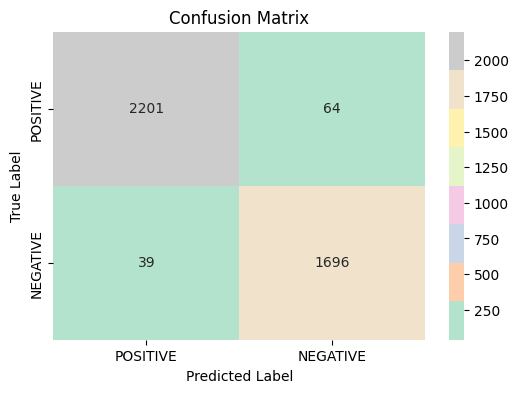

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Pastel2", xticklabels=['POSITIVE', 'NEGATIVE'], yticklabels=['POSITIVE', 'NEGATIVE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### In summary:

True Positive: 2201 positive reviews were correctly predicted as positive reviews

False Positive: 64 positive reviews were incorrectly predicted as negative reviews

False negative: 39 negative reviews were incorrectly predicted as positive reviews

True Negative: 1696 negative reviews were correctly predicted as positive reviews

### Performance Implication
